In [1]:
%load_ext autoreload
%autoreload 2

import cv2
import matplotlib.pyplot as plt
import numpy as np

import sys
sys.path.append("D:\\Projects\\Deep_Grasp\\deep_grasp_vgu\\deep_grasp_vgu\\deep_grasp_cnn\\src")

import ggcnn.ggcnn_torch as ggcnn_torch
from ggcnn.ggcnn_torch import predict, process_depth_image

import torch

ggcnn_torch.load_model_by_path("weights\\ggcnn_weights_cornell\\ggcnn_epoch_23_cornell")

from dougsm_helpers.gridshow import gridshow

Loading model from: weights\ggcnn_weights_cornell\ggcnn_epoch_23_cornell


D:\miniconda3\envs\yolox-build\lib\site-packages\torch\serialization.py:786: SourceChangeWarning: source code of class 'torch.nn.modules.conv.Conv2d' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
D:\miniconda3\envs\yolox-build\lib\site-packages\torch\serialization.py:786: SourceChangeWarning: source code of class 'torch.nn.modules.conv.ConvTranspose2d' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)


In [2]:
!dir self_data | findstr pcd

12-Sep-22  04:47 PM         1,229,072 pcd0100d.tiff
12-Sep-22  04:47 PM         1,229,072 pcd0101d.tiff
12-Sep-22  04:47 PM         1,229,072 pcd0102d.tiff
12-Sep-22  04:47 PM         1,229,072 pcd0103d.tiff
12-Sep-22  04:47 PM         1,229,072 pcd0104d.tiff
12-Sep-22  04:47 PM         1,229,072 pcd0105d.tiff


In [6]:
from imageio import imread

In [8]:
depth = imread("self_data\\pcd0100d.tiff")

D:\miniconda3\envs\yolox-build\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  """Entry point for launching an IPython kernel.


### Preprocess image

In [9]:
process_depth=True
crop_size=400
out_size=300
depth_nan_mask=None
crop_y_offset=0
filters=(2.0, 1.0, 1.0)

In [10]:
depth_crop, depth_nan_mask = process_depth_image(depth, crop_size, out_size=out_size, return_mask=True, crop_y_offset=crop_y_offset)

1: 0.0ms
2: 26.7ms
3: 0.0ms
4: 2.9ms
  Inpainting: 1.9ms
5: 6.0ms
6: 0.0ms


In [11]:
points, angle, width_img, _ = predict(depth_crop, process_depth=False, depth_nan_mask=depth_nan_mask, filters=(2.0, 2.0, 2.0))

In [13]:
depth_crop

array([[1.4989827 , 1.4996312 , 1.5000404 , ..., 1.9188418 , 1.9295839 ,
        1.949161  ],
       [1.4988607 , 1.5003562 , 1.5003619 , ..., 1.9225075 , 1.9311991 ,
        1.9461358 ],
       [1.4993036 , 1.4993702 , 1.499078  , ..., 1.9241108 , 1.9332222 ,
        1.9499449 ],
       ...,
       [0.80320936, 0.803264  , 0.8030815 , ..., 0.90637445, 0.9074157 ,
        0.9085171 ],
       [0.80168176, 0.8014958 , 0.8013138 , ..., 0.9049187 , 0.9058918 ,
        0.9070382 ],
       [0.79963076, 0.79973143, 0.79936063, ..., 0.90346485, 0.9045397 ,
        0.9056179 ]], dtype=float32)

In [14]:
color_image = imread("self_data\\pcd0100r.png")

D:\miniconda3\envs\yolox-build\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  """Entry point for launching an IPython kernel.


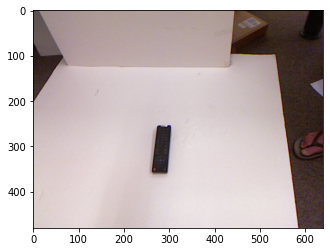

In [15]:
plt.imshow(color_image)

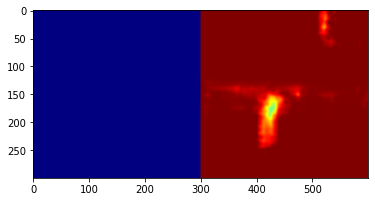

In [12]:
show = gridshow('Display',
            [depth_crop, points],
            [(0.2, 0.55), None, (-np.pi/2, np.pi/2)],
            [cv2.COLORMAP_JET, cv2.COLORMAP_JET, cv2.COLORMAP_BONE],
            3,
            False)
plt.imshow(show)